# Proyecto Final - Series de Tiempo Version Mejorada

### Objetivo ###

Emprolijar el proyecto 03 - Series de tiempo con el fin de aplicar: 

1. Inicialmente me gustaría incorporar otro tipo de variables propias del dataset en los modelos de machine learning.
2. Tambien me gustaría probar otro tipo de modelos como XGBOOST, Redes neuronales y/o SARIMA.
3. Por otro lado, probaría implementar en la etapa de preprocesamiento la técnica de Feature engineering en la cual pudiera adicionar variables diferentes a las propias del dataset ya sea a partir de una transformación de variables propias o adicionar variables externas. Como por ejemplo: el tipo de día, si el día es festivo, entre otras.
4. Finalmente, me gustaría implementar un metamodelo el cual estuviera compuesto por 7 modelos los cuales cada uno se encargarian de predecir un tipo de dia en especifico.

**Resultados esperados:**
Teniendo en cuenta la implementación de las ideas anteriomente mencionadas, esperaría que los resultados se mejoraran de forma abrupta tanto en el conjunto de entrenamiento como en el de validación. Sin embargo, sabiendo que el 2020 el comportamiento de la serie es atipico no esperaría que la predición en esta ventana de tiempo mejorara. 

### 1. Preparación del Dataset

### Importar librerias ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost
import pickle
import warnings
warnings.filterwarnings("ignore")

### Cargar datasets flujo vehicular ###

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

### Revisar estructura de cada datasets ###

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


In [7]:
dict_df={2019:data_2019, 2018:data_2018, 2017:data_2017,2016:data_2016}


def revisar_columnas_por_anio(dict,columna):

    for anio,df in dict_df.items():

        print("\n\033[1m Registros unicos de la variable "+columna+" para el año " + str(anio) + " son:\033[0m")
        print(df[columna].unique())

In [8]:
revisar_columnas_por_anio(dict_df,'estacion')


 Registros unicos de la variable estacion para el año 2019 son:
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']

 Registros unicos de la variable estacion para el año 2018 son:
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

 Registros unicos de la variable estacion para el año 2017 son:
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

 Registros unicos de la variable estacion para el año 2016 son:
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
revisar_columnas_por_anio(dict_df,'sentido')


 Registros unicos de la variable sentido para el año 2019 son:
['Centro' 'Provincia']

 Registros unicos de la variable sentido para el año 2018 son:
['Centro' 'Provincia']

 Registros unicos de la variable sentido para el año 2017 son:
['Centro' 'Provincia']

 Registros unicos de la variable sentido para el año 2016 son:
['Centro' 'Provincia']


In [10]:
revisar_columnas_por_anio(dict_df,'tipo_vehiculo')


 Registros unicos de la variable tipo_vehiculo para el año 2019 son:
['Liviano' 'Pesado']

 Registros unicos de la variable tipo_vehiculo para el año 2018 son:
['Liviano' 'Pesado']

 Registros unicos de la variable tipo_vehiculo para el año 2017 son:
['Liviano' 'Pesado']

 Registros unicos de la variable tipo_vehiculo para el año 2016 son:
['Liviano' 'Pesado']


In [11]:
revisar_columnas_por_anio(dict_df,'forma_pago')


 Registros unicos de la variable forma_pago para el año 2019 son:
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']

 Registros unicos de la variable forma_pago para el año 2018 son:
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']

 Registros unicos de la variable forma_pago para el año 2017 son:
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']

 Registros unicos de la variable forma_pago para el año 2016 son:
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

### Consolidado, filtrado y preparación del dataset###

In [12]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat(dict_df.values())

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]
dataset=dataset.drop_duplicates()

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

dataset['fecha_c'] = pd.to_datetime(dataset.fecha)

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['hora_fin','fecha'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True)

#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)

dataset.reset_index(drop=True, inplace = True)

dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,fecha_c
0,Viernes,Centro,Liviano,14,2016-01-01 00:00:00,2016-01-01
1,Viernes,Centro,Pesado,3,2016-01-01 00:00:00,2016-01-01
2,Viernes,Provincia,Liviano,66,2016-01-01 00:00:00,2016-01-01
3,Viernes,Provincia,Pesado,1,2016-01-01 00:00:00,2016-01-01
4,Viernes,Provincia,Pesado,4,2016-01-01 00:00:00,2016-01-01
...,...,...,...,...,...,...
317220,Martes,Provincia,Liviano,556,2019-12-31 22:00:00,2019-12-31
317221,Martes,Provincia,Pesado,1,2019-12-31 22:00:00,2019-12-31
317222,Martes,Centro,Liviano,580,2019-12-31 22:00:00,2019-12-31
317223,Martes,Centro,Liviano,214,2019-12-31 23:00:00,2019-12-31


### Cargar archivo festivos###


In [14]:
df_festivos=pd.read_csv('festivos_arg.csv', sep =';')
df_festivos['fecha_c']= pd.to_datetime(df_festivos['fecha'],dayfirst=True)
df_festivos.drop(columns='fecha',inplace=True)
df_festivos.head()

,Festivo,fecha_c
0,1,2016-01-01
1,1,2016-02-08
2,1,2016-02-09
3,1,2016-03-24
4,1,2016-03-25


In [15]:
df_festivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Festivo  94 non-null     int64         
 1   fecha_c  94 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [16]:
dataset=dataset.merge(df_festivos,on='fecha_c',how='left')
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,fecha_c,Festivo
0,Viernes,Centro,Liviano,14,2016-01-01,2016-01-01,1.0
1,Viernes,Centro,Pesado,3,2016-01-01,2016-01-01,1.0
2,Viernes,Provincia,Liviano,66,2016-01-01,2016-01-01,1.0
3,Viernes,Provincia,Pesado,1,2016-01-01,2016-01-01,1.0
4,Viernes,Provincia,Pesado,4,2016-01-01,2016-01-01,1.0


# Analisis exploratorio de datos #

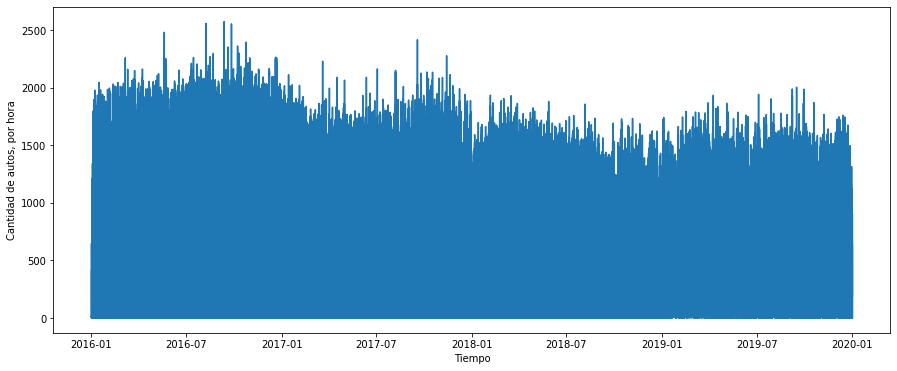

In [17]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [18]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').agg({'cantidad_pasos': np.sum, 'Festivo': 'mean'})
diario.reset_index(inplace=True)
print(diario.shape)
diario.head()

(1461, 3)


,fecha,cantidad_pasos,Festivo
0,2016-01-01,25574,1.0
1,2016-01-02,36113,NaN
2,2016-01-03,37178,NaN
3,2016-01-04,50281,NaN
4,2016-01-05,49883,NaN


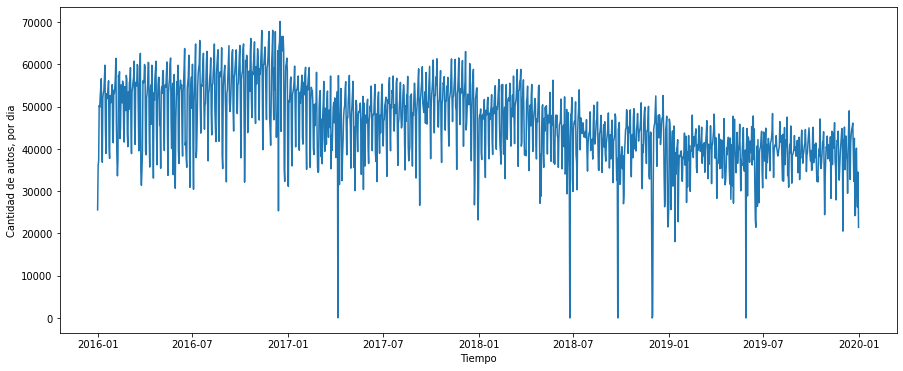

In [19]:
# Graficamos la serie resampleada 
plt.figure(figsize = (15,6))
plt.plot(diario.fecha, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Text(0, 0.5, 'Frecuencia')

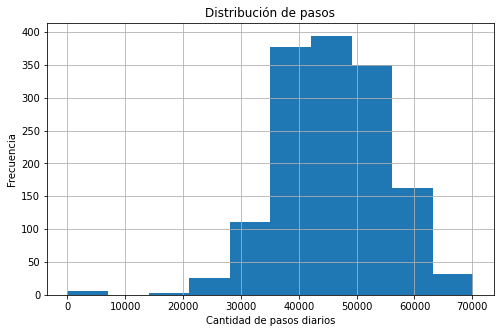

In [20]:
# Graficamos la distribución de la cantidad de pasos por dia
plt.rcParams['figure.figsize'] = [8,5]
diario['cantidad_pasos'].hist()
plt.title('Distribución de pasos')
plt.xlabel('Cantidad de pasos diarios')
plt.ylabel('Frecuencia')

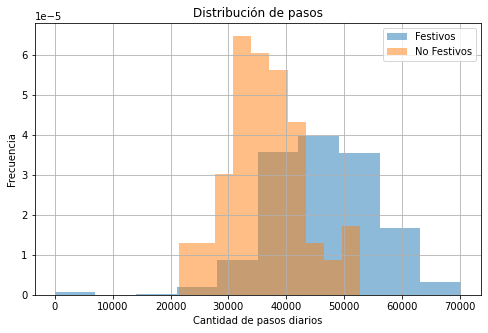

In [21]:
# Graficamos la distribución de la cantidad de pasos por dia
diario.loc[diario['Festivo'].isna(),'cantidad_pasos'].hist(density=True,alpha=0.5,label='Festivos')
diario.loc[~diario['Festivo'].isna(),'cantidad_pasos'].hist(density=True,alpha=0.5,label='No Festivos')
plt.title('Distribución de pasos')
plt.xlabel('Cantidad de pasos diarios')
plt.ylabel('Frecuencia')
plt.legend()

Se observa que las distribuciones son diferentes para los días festivos y los no festivos. La distribución de los días festivos es mas compacta y no está sesgada.

<AxesSubplot:>

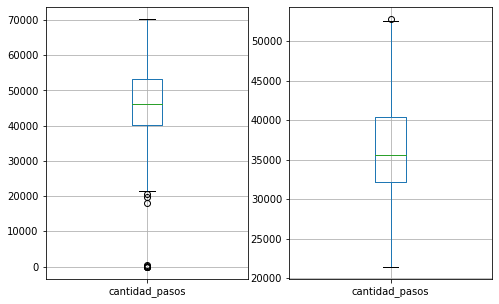

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
diario[diario['Festivo'].isna()].boxplot(column='cantidad_pasos',ax=ax1)
diario[diario['Festivo'].notnull()].boxplot(column='cantidad_pasos',ax=ax2)

In [23]:
# Verificar si la serie está completa
diario.fecha.diff().mean()

Timedelta('1 days 00:00:00')

In [24]:
# Verificar si la serie tiene valores nulos
diario.isnull().sum()

fecha                0
cantidad_pasos       0
Festivo           1387
dtype: int64

In [25]:
#Corregir valores atipicos de la serie

def valores_atipicos(df,ventana):
    '''Esta función identifica los valores atipicos de la serie en una ventana determinada mediante el z-score'''
    list_atipicos=[]
    samples=df.shape[0]
    if ventana >= samples:
        print('la ventana es mayor al numero de muestras')
    else:
        n_max=samples//ventana
        for i in range(0+ventana,samples-ventana):
            media_ventana=df.loc[i-ventana:i+ventana+1,'cantidad_pasos'].mean()
            std_ventana=df.loc[i-ventana:i+ventana,'cantidad_pasos'].std()
            if (abs(df.loc[i,'cantidad_pasos']-media_ventana)/std_ventana)>=3:
                list_atipicos.append({i:df.loc[i,'cantidad_pasos']})
    return list_atipicos

def corregir_valores_atipicos(df,valores):
    '''Esta función actualiza el valor de la posción del valor atipico con el último valor del mismo tipo de día'''
    for i in valores:
        index=list(i.keys())
        df.loc[index[0],'cantidad_pasos']=df.loc[index[0]-7,'cantidad_pasos']
    return  df

def armar_dataset(df,nlags):
    '''Funcion para convertir una serie de tiempo en un dataset estructurado para modelos de machine learning'''
    df_aux=df.copy()
    for i in range(1,nlags+1):
        
        var="lag_"+str(i)
        df_aux[var]=df.shift(periods=i)
    return df_aux

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    
    is_max = s.max()
    is_min = s.min()

    list_color = []
    for k in s:
        if k == s.max():
            list_color.append('background-color: #FF2525')
        elif k == s.min():
            list_color.append('background-color: #99FF66')
        else:
            list_color.append('')
    return list_color

In [26]:
#Validamos los valores atipicos en una ventana de 14 dias 
valores_atipicos(diario,14)

[{461: 40},
 {618: 26656},
 {689: 35154},
 {906: 0},
 {998: 0},
 {1064: 0},
 {1065: 350},
 {1244: 0},
 {1430: 20553}]

In [27]:
# Corregimos los valores atipicos identificados previamente
diario_corr=corregir_valores_atipicos(diario,valores_atipicos(diario,14))

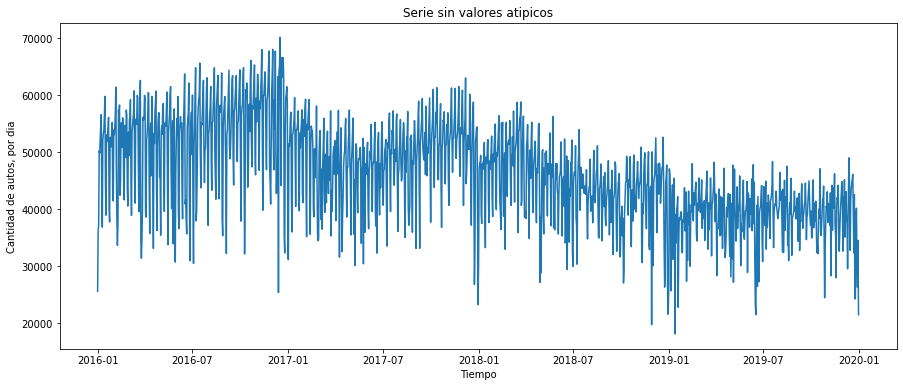

In [28]:
# Graficamos nuevamente la serie corregida
plt.figure(figsize = (15,6))
plt.plot(diario_corr.fecha, diario_corr.cantidad_pasos)
plt.title('Serie sin valores atipicos')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Text(0, 0.5, 'Frecuencia')

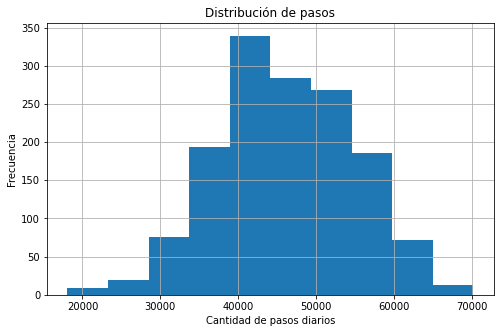

In [29]:
# Graficamos la distribución de la serie corregida
diario_corr['cantidad_pasos'].hist()
plt.title('Distribución de pasos')
plt.xlabel('Cantidad de pasos diarios')
plt.ylabel('Frecuencia')

## Componentes de la serie

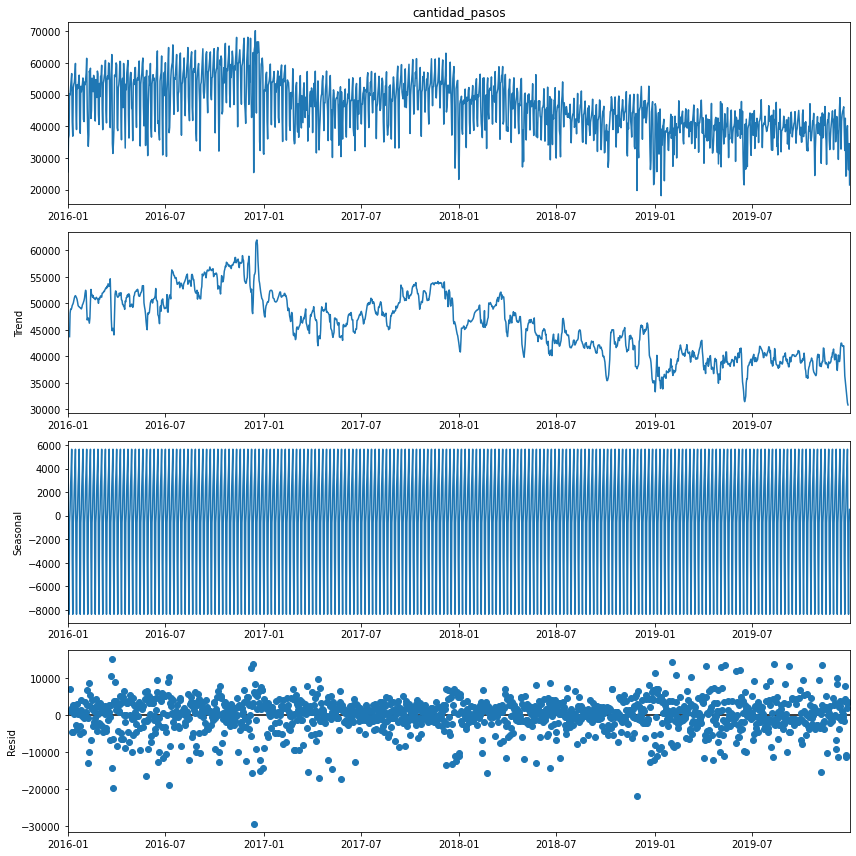

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [12,12]

diario_corr.set_index('fecha',inplace=True)

result = seasonal_decompose(diario_corr.loc[:,'cantidad_pasos'], model='additive')
result.plot()
plt.show()

Text(0, 0.5, 'Frecuencia')

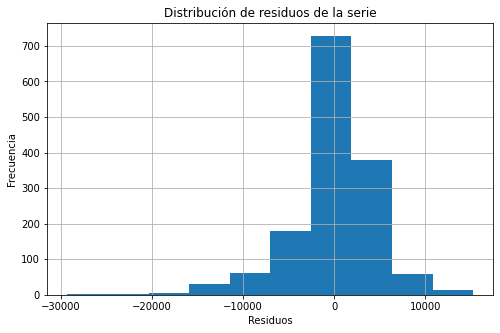

In [31]:
plt.rcParams['figure.figsize'] = [8,5]
result.resid.hist()
plt.title('Distribución de residuos de la serie')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Analisis autocorrelaciones#

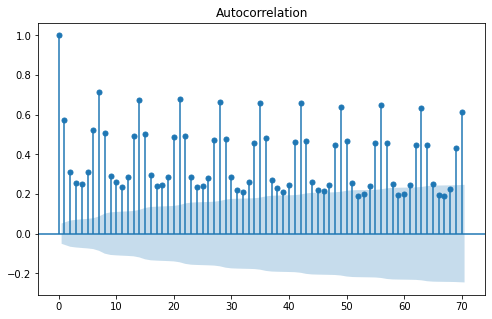

In [32]:
#Establecer número de lags a evaluar
nlags =  7*10

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario_corr["cantidad_pasos"], lags = nlags)
plt.show()

En la grafico de autocorrelación se observa un valor de resago fuerte cada 7 días y se conserva a lo largo del tiempo en la ventana evaluada. Esto nos da un indicio de que el valor tk depende de en gran parte de lo ocurrido en los tk-7n donde n>0. 

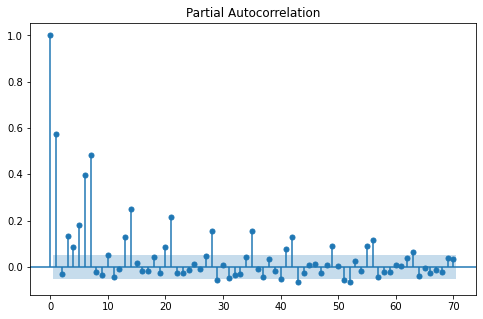

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diario_corr["cantidad_pasos"], lags = nlags)
plt.show()

En la grafico de autocorrelación parcial no se observa un valor de resago a lo largo del tiempo. 

# Implementación modelo benchmark #

Mi modelo benchmark a utilizar será el RandomForest optimizado el cual fue el modelo que seleccione como mejor en el proyecto 3. 

Los resultados obtenidos para este modelo fueron los siguientes:

In [34]:
dicc_errores={'Modelo':'RF Optimizado',
              'RMSE_Train':3314.684,
              'RMSE_Test':4967.834,
               r'$R^2 Train$':0.79,
               r'$R^2 Test$':0.197,
               'MAPE_Train':6.182,
               'MAPE_Test':10.762}


df_errores=pd.DataFrame([dicc_errores])
df_errores

,Modelo,RMSE_Train,RMSE_Test,$R^2 Train$,$R^2 Test$,MAPE_Train,MAPE_Test
0,RF Optimizado,3314.684,4967.834,0.79,0.197,6.182,10.762


In [35]:
# Calcular metrica de desempeño RMSE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 

def evaluar_metricas(y_train,y_pred_train,y_test,y_pred_test,n_decimales):
    
    y_pred_train=np.nan_to_num(y_pred_train)

    rmse_train_bench = round(np.sqrt(mean_squared_error(y_train, y_pred_train)),n_decimales)
    rmse_test_bench = round(np.sqrt(mean_squared_error(y_test, y_pred_test)),n_decimales)

    # Calcular metrica de desempeño R^2
    r2_train_bench = round(r2_score(y_train, y_pred_train),n_decimales)
    r2_test_bench = round(r2_score(y_test, y_pred_test),n_decimales)

    # Calcular metrica de desempeño MAPE
    mape_train_bench = round(mean_absolute_percentage_error(y_train, y_pred_train),n_decimales)
    mape_test_bench = round(mean_absolute_percentage_error(y_test, y_pred_test),n_decimales)
    
    return [rmse_train_bench,rmse_test_bench,r2_train_bench,r2_test_bench,mape_train_bench,mape_test_bench]

# Implementación modelo SARIMA #

In [36]:
# Crear lista de parametros para el modelo#
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)


In [37]:
N_train = 2*365 # cantidad de instancias que vamos a usar para entrenar. 
N_test = 3*30 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test
L=diario_corr.shape[0]
y_bench=armar_dataset(diario_corr.drop(columns='Festivo'),1)
y_bench=y_bench.reset_index()
train= y_bench.loc[L-N_total:L-N_test-1,'cantidad_pasos'].values
test=y_bench.loc[L-N_test:,'cantidad_pasos'].values

In [38]:
import statsmodels.api as sm
df_aic=pd.DataFrame(data=[],columns=['params','aic'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try: 
            mod = sm.tsa.statespace.SARIMAX(train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            d = {'params':['ARIMA{}x{}12'.format(param,param_seasonal)], 'aic':[results.aic]}
            df_2 = pd.DataFrame(data=d)
            df_aic=df_aic.append(df_2)
        except:
            print('No se pudo entrenar el modelo con los parametros {}x{}'.format(param,param_seasonala))
            continue

In [39]:
#df_aic['index']=range(0,df_aic.shape[0])
#df_aic.set_index(keys='index',inplace=True)
df_aic[df_aic['aic']==df_aic['aic'].min()]

,params,aic
0,"ARIMA(1, 1, 1)x(1, 0, 1, 12)12",14408.747124


In [40]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2600      0.044      5.912      0.000       0.174       0.346
ma.L1         -0.9494      0.017    -56.299      0.000      -0.982      -0.916
ar.S.L12       0.0872      0.206      0.424      0.672      -0.316       0.491
ma.S.L12      -0.2442      0.206     -1.183      0.237      -0.649       0.160
sigma2      4.085e+07   8.41e-10   4.85e+16      0.000    4.08e+07    4.08e+07


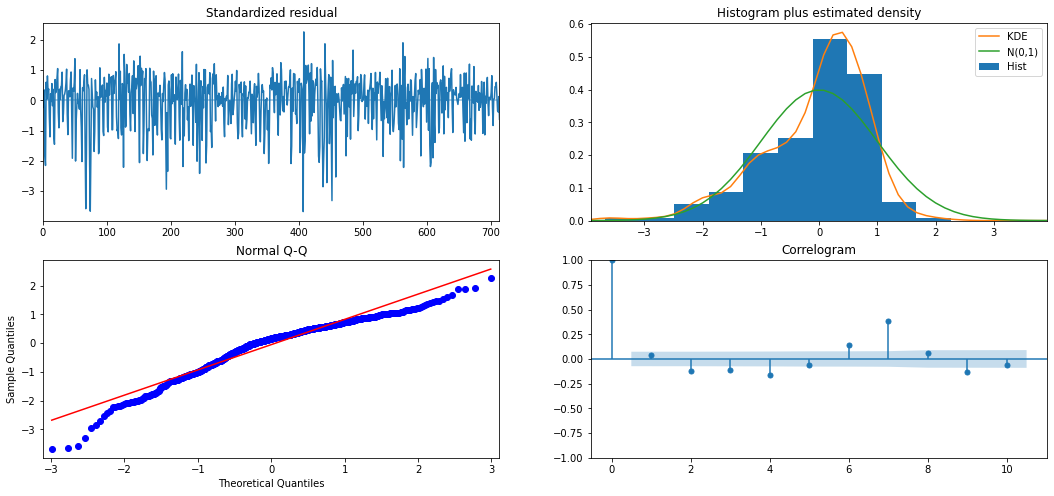

In [41]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

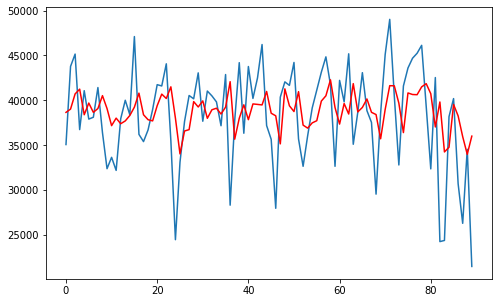

In [42]:
# Modelo SARIMA ganador
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    best_model_sarima = sm.tsa.statespace.SARIMAX(history,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    best_model_sarima_fit = best_model_sarima.fit()
    output = best_model_sarima_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [43]:
results_sarima=evaluar_metricas(y_bench.loc[L-N_total:L-N_test-1,'cantidad_pasos'],
                              results.fittedvalues[:N_train],
                              y_bench.loc[L-N_test:,'cantidad_pasos'],
                              predictions,3)

results_sarima.insert(0,'SARIMA_optimizado')

df_errores.loc[df_errores.shape[0]]=results_sarima

df_errores.style.apply(highlight_max,subset=['RMSE_Train', 'RMSE_Test','MAPE_Train', 'MAPE_Test'])

,Modelo,RMSE_Train,RMSE_Test,$R^2 Train$,$R^2 Test$,MAPE_Train,MAPE_Test
0,RF Optimizado,3314.684000,4967.834000,0.790000,0.197000,6.182000,10.762000
1,SARIMA_optimizado,5976.136000,5318.768000,0.316000,0.079000,11.364000,12.163000


# Implementación Nuevas Variables  #

In [44]:
n_lags=7*2
df_ml=armar_dataset(diario_corr.drop(columns='Festivo'),n_lags)
df_ml.reset_index(inplace=True)
df_ml.head(10)

,fecha,cantidad_pasos,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
0,2016-01-01,25574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,36113,25574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,37178,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,50281,37178.0,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,49883,50281.0,37178.0,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-06,52461,49883.0,50281.0,37178.0,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-07,54452,52461.0,49883.0,50281.0,37178.0,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-08,56616,54452.0,52461.0,49883.0,50281.0,37178.0,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-09,41412,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-10,36852,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0,36113.0,25574.0,NaN,NaN,NaN,NaN,NaN


In [45]:
df_ml_2=df_ml.loc[n_lags:,]
df_ml_2.head()

,fecha,cantidad_pasos,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
14,2016-01-15,59824,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0,36113.0,25574.0
15,2016-01-16,44924,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0,36113.0
16,2016-01-17,38950,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0
17,2016-01-18,53053,38950.0,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0
18,2016-01-19,51881,53053.0,38950.0,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0


In [46]:
df_ml_2=df_ml_2.merge(df_festivos,right_on='fecha_c',left_on='fecha',how='left').drop(columns='fecha_c')
df_ml_2.head()

,fecha,cantidad_pasos,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,Festivo
0,2016-01-15,59824,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0,36113.0,25574.0,NaN
1,2016-01-16,44924,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0,36113.0,NaN
2,2016-01-17,38950,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,37178.0,NaN
3,2016-01-18,53053,38950.0,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,50281.0,NaN
4,2016-01-19,51881,53053.0,38950.0,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,52461.0,49883.0,NaN


In [47]:
# reemplazar nan columna Festivo
df_ml_2.loc[df_ml_2['Festivo'].isna(),'Festivo']=0
df_ml_2['Festivo'].value_counts()

0.0    1374
1.0      73
Name: Festivo, dtype: int64

In [48]:
def diff_lags(df,n_lags):
    
    '''Funcion para convertir una serie de tiempo en un dataset estructurado para modelos de machine learning'''
    df_aux=df.copy()
    for i in range(n_lags,1,-1):
        
        var="diff_lag_"+str(i)+"_"+str(i-1)
        df_aux[var]=df_aux.loc[:,"lag_"+str(i)]-df_aux.loc[:,"lag_"+str(i-1)]
    return df_aux

In [49]:
df_ml_3=diff_lags(df_ml_2,n_lags)
df_ml_3.head()

,fecha,cantidad_pasos,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,diff_lag_11_10,diff_lag_10_9,diff_lag_9_8,diff_lag_8_7,diff_lag_7_6,diff_lag_6_5,diff_lag_5_4,diff_lag_4_3,diff_lag_3_2,diff_lag_2_1
0,2016-01-15,59824,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,54452.0,...,398.0,-2578.0,-1991.0,-2164.0,15204.0,4560.0,-15304.0,-1124.0,-573.0,-2482.0
1,2016-01-16,44924,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,56616.0,...,-2578.0,-1991.0,-2164.0,15204.0,4560.0,-15304.0,-1124.0,-573.0,-2482.0,-3489.0
2,2016-01-17,38950,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,41412.0,...,-1991.0,-2164.0,15204.0,4560.0,-15304.0,-1124.0,-573.0,-2482.0,-3489.0,14900.0
3,2016-01-18,53053,38950.0,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,36852.0,...,-2164.0,15204.0,4560.0,-15304.0,-1124.0,-573.0,-2482.0,-3489.0,14900.0,5974.0
4,2016-01-19,51881,53053.0,38950.0,44924.0,59824.0,56335.0,53853.0,53280.0,52156.0,...,15204.0,4560.0,-15304.0,-1124.0,-573.0,-2482.0,-3489.0,14900.0,5974.0,-14103.0


In [50]:
df_ml_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           1447 non-null   datetime64[ns]
 1   cantidad_pasos  1447 non-null   int64         
 2   lag_1           1447 non-null   float64       
 3   lag_2           1447 non-null   float64       
 4   lag_3           1447 non-null   float64       
 5   lag_4           1447 non-null   float64       
 6   lag_5           1447 non-null   float64       
 7   lag_6           1447 non-null   float64       
 8   lag_7           1447 non-null   float64       
 9   lag_8           1447 non-null   float64       
 10  lag_9           1447 non-null   float64       
 11  lag_10          1447 non-null   float64       
 12  lag_11          1447 non-null   float64       
 13  lag_12          1447 non-null   float64       
 14  lag_13          1447 non-null   float64       
 15  lag_

# Implementar XGBoost #

In [82]:
df_ml_3.iloc[:,2:].to_csv('df_train.csv',index=False)

In [87]:
df_ml_3.iloc[-1,2:]

lag_1             34523
lag_2             26259
lag_3             30681
lag_4             40182
lag_5             38168
lag_6             24349
lag_7             24220
lag_8             42531
lag_9             32337
lag_10            39303
lag_11            46128
lag_12            45241
lag_13            44687
lag_14            43597
Festivo               0
diff_lag_14_13    -1090
diff_lag_13_12     -554
diff_lag_12_11     -887
diff_lag_11_10     6825
diff_lag_10_9      6966
diff_lag_9_8     -10194
diff_lag_8_7      18311
diff_lag_7_6       -129
diff_lag_6_5     -13819
diff_lag_5_4      -2014
diff_lag_4_3       9501
diff_lag_3_2       4422
diff_lag_2_1      -8264
Name: 1446, dtype: object

In [107]:
X[1446]

array([ 34523.,  26259.,  30681.,  40182.,  38168.,  24349.,  24220.,
        42531.,  32337.,  39303.,  46128.,  45241.,  44687.,  43597.,
            0.,  -1090.,   -554.,   -887.,   6825.,   6966., -10194.,
        18311.,   -129., -13819.,  -2014.,   9501.,   4422.,  -8264.])

In [106]:
X=df_ml_3.iloc[:,2:].values

y=df_ml_3.iloc[:,1].values

L=X.shape[0]
X_train,X_test=X[L-N_total:L-N_test],X[L-N_test:]
y_train,y_test=y[L-N_total:L-N_test],y[L-N_test:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(730, 28)
(90, 28)
(730,)
(90,)


In [52]:
tscv = TimeSeriesSplit(n_splits=5)

# Instantiation
xgb_r = xgboost.XGBRegressor(objective ='reg:squarederror', seed = 123)

xgb_r_scores=cross_validate(xgb_r,
                    X=X_train,
                    y=y_train,
                    cv=tscv, 
                    return_train_score=True, 
                    n_jobs = -1,
                    scoring='neg_mean_squared_error')

xgb_r_scores

{'fit_time': array([0.06205606, 0.05004382, 0.06606007, 0.11510515, 0.14613175]),
 'score_time': array([0.00100088, 0.00100112, 0.00100088, 0.002002  , 0.00200272]),
 'test_score': array([-27728956.43550223, -15290061.07256386, -34072210.16817188,
        -28745833.3920156 , -16738795.23982069]),
 'train_score': array([ -363948.95971878, -1926378.78230318, -2905667.6549385 ,
        -4885957.81694188, -6505989.56673193])}

In [53]:
# Entrenar modelo xgboost
xgb_r.fit(X_train,y_train)

# Realizar prediciones con los modelos entrenados : X_train
y_pred_train_xg = xgb_r.predict(X_train)

# Realizar prediciones con los modelos entrenados
y_pred_test_xg = xgb_r.predict(X_test)

results_xg=evaluar_metricas(y_train,
                              y_pred_train_xg,
                              y_test,
                              y_pred_test_xg,3)

results_xg.insert(0,'XGBoost_No_Optimizado')

df_errores.loc[df_errores.shape[0]]=results_xg

df_errores.style.apply(highlight_max,subset=['RMSE_Train', 'RMSE_Test','MAPE_Train', 'MAPE_Test'])

,Modelo,RMSE_Train,RMSE_Test,$R^2 Train$,$R^2 Test$,MAPE_Train,MAPE_Test
0,RF Optimizado,3314.684000,4967.834000,0.790000,0.197000,6.182000,10.762000
1,SARIMA_optimizado,5976.136000,5318.768000,0.316000,0.079000,11.364000,12.163000
2,XGBoost_No_Optimizado,2691.689000,5110.993000,0.861000,0.150000,5.133000,11.312000


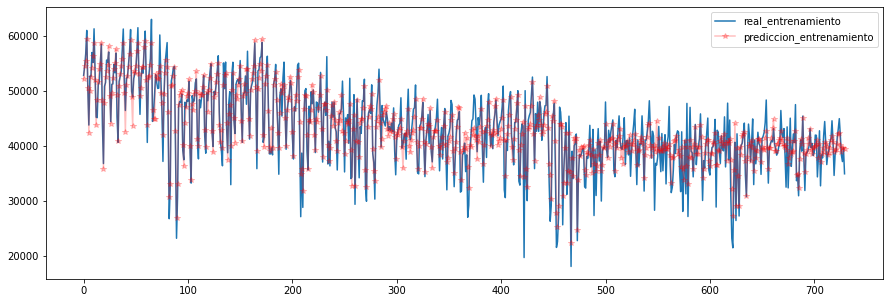

In [54]:
# plot
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(y_train,label='real_entrenamiento')
plt.plot(y_pred_train_xg,'*-' ,color='red',alpha=0.25,label='prediccion_entrenamiento')
plt.legend()
plt.show()

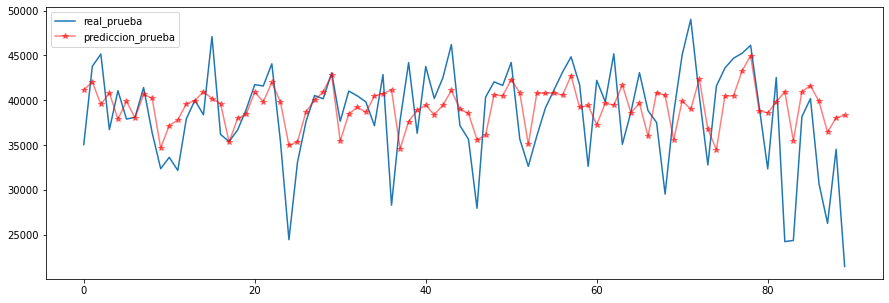

In [55]:
# plot
plt.plot(y_test,label='real_prueba')
plt.plot(y_pred_test_xg,'*-' ,color='red',alpha=0.5,label='prediccion_prueba')
plt.legend()
plt.show()

# Implementar XGBoost optimizado aplicando optimización Bayesiana#

Para esta oportunidad me permití implementar una busqueda de los valores optimos de los hiperparametros del modelo elegido mediante la optimización bayesiana. Link: https://github.com/fmfn/BayesianOptimization

In [56]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# DEFINIR FUNCION OPTIMIZAR PARA XGBOOST

def train_model_xgb(max_depth, n_estimators,gamma,
                    reg_lambda,learning_rate,colsample_bytree,min_child_weight):
    tscv = TimeSeriesSplit(n_splits=5)
    
    scores= cross_val_score(
               xgboost.XGBRegressor(
                       objective="reg:squarederror",
                       learning_rate=max(learning_rate, 0),
                       colsample_bytree=max(colsample_bytree,0),
                       min_child_weight = max(min_child_weight,0),
                       max_depth=int(max_depth),
                       n_estimators=int(n_estimators),
                       reg_lambda=max(reg_lambda,0),
                       gamma=max(gamma,0),
                       seed=42,
                       nthread=-1),  
        
               X=X_train, 
               y=y_train, 
               cv=tscv,
               scoring="neg_mean_squared_error",
               n_jobs=-1)
    
    scores=np.where(scores<-500, scores,-2e10)
     
    return scores.mean()

In [57]:
gbm_param_grid = {
    'learning_rate': (0,1),
    'max_depth': (5,10),
    'n_estimators': (50,100),
    'colsample_bytree':(0.4,0.8),
    'min_child_weight':(1,20),
    'gamma':(10,20),
    'reg_lambda': (10,50)}

print(gbm_param_grid)

{'learning_rate': (0, 1), 'max_depth': (5, 10), 'n_estimators': (50, 100), 'colsample_bytree': (0.4, 0.8), 'min_child_weight': (1, 20), 'gamma': (10, 20), 'reg_lambda': (10, 50)}


In [58]:
optimizer_xgb = BayesianOptimization(f=train_model_xgb,
                                    pbounds=gbm_param_grid,random_state=123)

In [59]:
optimizer_xgb.maximize(init_points=50,n_iter=100)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_la... |
-------------------------------------------------------------------------------------------------------------
|  1        | -2.586e+0 |  0.6786   |  12.86    |  0.2269   |  7.757    |  14.67    |  71.16    |  49.23    |
|  2        | -2.761e+0 |  0.6739   |  14.81    |  0.3921   |  6.716    |  14.85    |  71.93    |  12.39    |
|  3        | -2.503e+0 |  0.5592   |  17.38    |  0.1825   |  5.877    |  11.1     |  76.59    |  35.38    |
|  4        | -2.95e+07 |  0.7398   |  17.24    |  0.611    |  8.612    |  7.136    |  68.09    |  19.13    |
|  5        | -2.439e+0 |  0.5175   |  16.31    |  0.0921   |  7.169    |  9.186    |  74.68    |  27.03    |
|  6        | -3.313e+0 |  0.5249   |  14.26    |  0.8934   |  9.721    |  10.53    |  81.2     |  14.62    |
|  7        | -2.978e+0 |  0.5269   |  14.15    |  0.8663   |  6.252    |  10.18    |  99.28    |  30.78    |
|  8      

|  45       | -3.047e+0 |  0.6272   |  12.25    |  0.5721   |  8.305    |  6.667    |  70.93    |  28.12    |
|  46       | -3.155e+0 |  0.7729   |  15.87    |  0.9483   |  7.78     |  10.51    |  50.18    |  29.24    |
|  47       | -2.451e+0 |  0.771    |  11.98    |  0.05209  |  7.034    |  8.076    |  92.86    |  11.06    |
|  48       | -3.106e+0 |  0.7681   |  16.81    |  0.9042   |  8.038    |  16.43    |  66.78    |  23.98    |
|  49       | -2.84e+07 |  0.5559   |  17.55    |  0.3693   |  6.211    |  18.82    |  95.4     |  23.95    |
|  50       | -2.594e+0 |  0.6539   |  12.74    |  0.2061   |  6.682    |  7.215    |  94.11    |  42.89    |
|  51       | -2.736e+0 |  0.7078   |  12.87    |  0.2602   |  5.412    |  9.974    |  72.13    |  12.59    |
|  52       | -3.397e+0 |  0.8      |  12.32    |  1.0      |  6.608    |  13.85    |  75.91    |  10.34    |
|  53       | -2.572e+0 |  0.5641   |  15.28    |  0.3293   |  6.654    |  12.21    |  65.57    |  29.79    |
|  54     

|  91       | -2.942e+0 |  0.7339   |  18.67    |  0.6406   |  5.851    |  9.115    |  72.86    |  14.69    |
|  92       | -3.266e+0 |  0.8      |  14.66    |  1.0      |  10.0     |  17.22    |  67.8     |  29.07    |
|  93       | -1.779e+0 |  0.8      |  18.93    |  0.0      |  10.0     |  8.052    |  77.44    |  14.73    |
|  94       | -3.753e+0 |  0.6779   |  16.15    |  0.03535  |  7.517    |  15.65    |  63.0     |  27.07    |
|  95       | -3.1e+07  |  0.6904   |  16.17    |  0.8317   |  8.237    |  11.82    |  67.28    |  25.8     |
|  96       | -3.226e+0 |  0.8      |  16.36    |  0.9286   |  8.648    |  7.407    |  68.87    |  27.07    |
|  97       | -3.431e+0 |  0.6511   |  15.13    |  0.9659   |  5.838    |  7.228    |  71.25    |  16.98    |
|  98       | -3.519e+0 |  0.4      |  13.14    |  1.0      |  5.0      |  9.006    |  77.41    |  11.03    |
|  99       | -3.387e+0 |  0.4225   |  12.01    |  1.0      |  6.39     |  14.72    |  63.81    |  24.7     |
|  100    

|  137      | -1.779e+0 |  0.4123   |  20.0     |  0.0      |  10.0     |  1.356    |  62.27    |  32.19    |
|  138      | -2.88e+07 |  0.4119   |  14.52    |  0.3116   |  6.089    |  13.55    |  79.95    |  11.89    |
|  139      | -1.779e+0 |  0.8      |  17.76    |  0.0      |  8.441    |  5.755    |  77.51    |  34.34    |
|  140      | -3.752e+0 |  0.4323   |  12.9     |  0.7316   |  7.276    |  10.43    |  79.52    |  12.46    |
|  141      | -3.345e+0 |  0.6915   |  15.54    |  0.8505   |  7.834    |  8.616    |  67.86    |  23.47    |
|  142      | -3.079e+0 |  0.6846   |  15.3     |  0.665    |  7.785    |  6.195    |  72.12    |  24.86    |
|  143      | -2.615e+0 |  0.8      |  16.86    |  0.2553   |  7.554    |  12.71    |  63.85    |  23.88    |
|  144      | -3.505e+0 |  0.4      |  14.94    |  1.0      |  6.982    |  14.69    |  60.73    |  23.76    |
|  145      | -3.232e+0 |  0.5466   |  16.96    |  1.0      |  6.592    |  16.6     |  57.83    |  26.82    |
|  146    

In [60]:
best_xgb = optimizer_xgb.max

best_params_xgb=best_xgb['params']
best_params_xgb['n_estimators']=int(best_params_xgb['n_estimators']) 
best_params_xgb['max_depth']=int(best_params_xgb['max_depth'])
best_params_xgb['reg_lambda'] = best_params_xgb['reg_lambda']
best_params_xgb['learning_rate'] = best_params_xgb['learning_rate']
best_params_xgb['colsample_bytree'] = best_params_xgb['colsample_bytree']
best_params_xgb['min_child_weight'] = best_params_xgb['min_child_weight']
best_params_xgb['gamma'] = best_params_xgb['gamma']
best_params_xgb

{'colsample_bytree': 0.7060384380957226,
 'gamma': 15.656420012258828,
 'learning_rate': 0.0849041631918176,
 'max_depth': 7,
 'min_child_weight': 16.482030354974782,
 'n_estimators': 66,
 'reg_lambda': 47.10306318301558}

In [61]:
model_xgb =xgboost.XGBRegressor(objective="reg:squarederror",seed=123,
                       nthread=-1)
model_xgb.set_params(**best_params_xgb)

XGBRegressor(colsample_bytree=0.7060384380957226, gamma=15.656420012258828,
             learning_rate=0.0849041631918176, max_depth=7,
             min_child_weight=16.482030354974782, n_estimators=66, nthread=-1,
             objective='reg:squarederror', reg_lambda=47.10306318301558,
             seed=123)

In [62]:
# Entrenar modelo xgboost
model_xgb.fit(X_train,y_train)

# Realizar prediciones con los modelos entrenados : X_train
y_pred_train_xg = model_xgb.predict(X_train)

# Realizar prediciones con los modelos entrenados
y_pred_test_xg = model_xgb.predict(X_test)

results_xg=evaluar_metricas(y_train,
                              y_pred_train_xg,
                              y_test,
                              y_pred_test_xg,3)

results_xg.insert(0,'XGBoost_Optimizado')

df_errores.loc[df_errores.shape[0]]=results_xg

df_errores.style.apply(highlight_max,subset=['RMSE_Train', 'RMSE_Test','MAPE_Train', 'MAPE_Test'])

,Modelo,RMSE_Train,RMSE_Test,$R^2 Train$,$R^2 Test$,MAPE_Train,MAPE_Test
0,RF Optimizado,3314.684000,4967.834000,0.790000,0.197000,6.182000,10.762000
1,SARIMA_optimizado,5976.136000,5318.768000,0.316000,0.079000,11.364000,12.163000
2,XGBoost_No_Optimizado,2691.689000,5110.993000,0.861000,0.150000,5.133000,11.312000
3,XGBoost_Optimizado,3640.367000,5047.024000,0.746000,0.171000,6.793000,11.224000


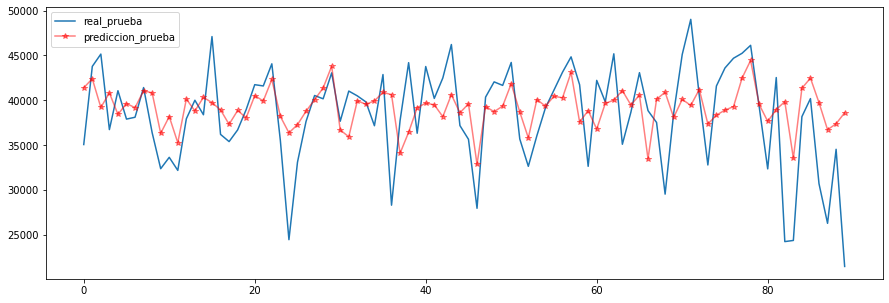

In [63]:
# plot
plt.plot(y_test,label='real_prueba')
plt.plot(y_pred_test_xg,'*-' ,color='red',alpha=0.5,label='prediccion_prueba')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

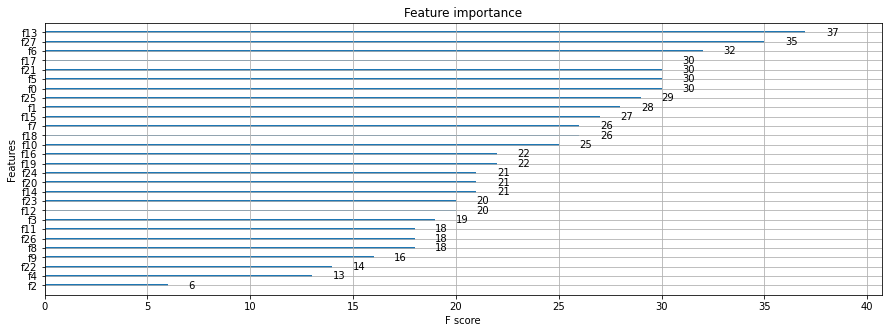

In [64]:
xgboost.plot_importance(model_xgb)

De los resultados obtenidos los dnuevos modelos probados se tienen los siguientes comentarios:

1. El modelo XGBoost no optimizado fue el que obtuvo el peor desempeño.
2. El modelo SARIMA tienden a generalizar mas el comportamiento de la serie de tiempo debido a que el gap entre el desempeño en Train y Test son significativamente mas bajo que en los modelos de Random Forests y XGBoost. 
2. Dentro de los dos modelos basados en árboles, el modelo de XGBoost con hiperparametros por defecto tuvo un sobreajuste alto el cual hizo que aprendiera de forma muy exacta la serie de entrenamiento.
3. El modelo XGBoost con la optimización bayesiana proporcionó un desempeño más estable que el no optimizado.
4. Las variables nuevas agregadas al conjunto de datos inicial proporcionaron una mejora no muy significativa al desempeño del modelo en comparación del modelo con el conjunto de datos original.
5. Sería recomendable realizar la misma validación pero predicciendo por tipo de día, es decir, implementar un modelo para cada día de la semana y así no combinar las tendencias de días no similares.

Teniendo en cuenta las observaciones anteriores selecciono el modelo XGBoost Optimizado para predecir el año 2020.

# Predición año 2020 # 


In [65]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [66]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847933 entries, 0 to 1847932
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   mes             object
 3   dia             object
 4   dia_fecha       int64 
 5   hora_inicio     int64 
 6   hora_fin        int64 
 7   estacion        object
 8   tipo_vehiculo   object
 9   forma_pago      object
 10  observacion     object
 11  sentido         object
 12  cantidad_pasos  int64 
dtypes: int64(5), object(8)
memory usage: 183.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [67]:
print('Valores unicos columna estacion: ')
print(data_2020['estacion'].value_counts())

Valores unicos columna estacion: 
AVELLANEDA                          399602
ILP                                 219426
ILLIA                               215490
DELLEPIANE LINIERSLEPIANE CENTRO    182586
DELLEPIANE LINIERS                  180588
ALBERDI                             139270
PB1                                 120224
PB4                                 108538
PB2                                  81200
RETIRO                               71109
PB3                                  59796
SALGUERO                             36318
SARMIENTO                            33786
Name: estacion, dtype: int64


In [68]:
print('Valores unicos columna forma de pago: ')
print(data_2020['forma_pago'].value_counts())

Valores unicos columna forma de pago: 
Tag                  1045096
Violación             312230
Efectivo              196304
Rec.Deuda             130578
Exento                110340
Tarjeta Magnética      36006
CPP                    17379
Name: forma_pago, dtype: int64


In [69]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020_n = data_2020[mask]
data_2020_n=data_2020_n.drop_duplicates()

#Quitamos las columnas que no vamos a utilizar
data_2020_n.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

data_2020_n.head()

,fecha,mes,dia,dia_fecha,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos
52,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Efectivo,Centro,326
53,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Efectivo,Provincia,319
134,2020-01-01 00:00:00,enero,Miércoles,1,2,Auto,Efectivo,Centro,199
135,2020-01-01 00:00:00,enero,Miércoles,1,2,Auto,Efectivo,Provincia,180
202,2020-01-01 00:00:00,enero,Miércoles,1,3,Auto,Efectivo,Centro,114


In [70]:
data_2020_n.shape

(39072, 9)

In [71]:
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020_n['fecha2'] = pd.to_datetime(data_2020_n.fecha) + pd.to_timedelta(data_2020_n.hora_fin, unit = 'h')


# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020_n.drop(columns=['fecha','hora_fin'], inplace = True)


# Corregimos el nombre de fecha2 a fecha
data_2020_n.rename(columns = {'fecha2':'fecha'}, inplace = True)


#Reordenamos el dataset por fecha
data_2020_n.sort_values('fecha', inplace = True)


data_2020_n.reset_index(drop=True, inplace = True)

data_2020_n.head()

,mes,dia,dia_fecha,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha
0,enero,Miércoles,1,Auto,Efectivo,Centro,467,2020-01-01
1,enero,Miércoles,1,Moto,Efectivo,Centro,7,2020-01-01
2,enero,Miércoles,1,Auto,Efectivo,Provincia,423,2020-01-01
3,enero,Miércoles,1,Moto,Efectivo,Provincia,6,2020-01-01
4,enero,Miércoles,1,Pesados 2 Ejes,Efectivo,Centro,1,2020-01-01


In [72]:
data_2020_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39072 entries, 0 to 39071
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mes             39072 non-null  object        
 1   dia             39072 non-null  object        
 2   dia_fecha       39072 non-null  int64         
 3   tipo_vehiculo   39072 non-null  object        
 4   observacion     39072 non-null  object        
 5   sentido         39072 non-null  object        
 6   cantidad_pasos  39072 non-null  int64         
 7   fecha           39072 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.4+ MB


In [73]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_2020 = data_2020_n.resample('D', on = 'fecha').sum()
diario_2020.reset_index(inplace=True)
print(diario_2020.shape)
diario_2020.head()

(274, 3)


,fecha,dia_fecha,cantidad_pasos
0,2020-01-01,184,21395
1,2020-01-02,408,33722
2,2020-01-03,618,37067
3,2020-01-04,824,30627
4,2020-01-05,1085,27812


In [74]:
diario_2020.drop(columns=['dia_fecha'],inplace=True)
diario_2020.head()

,fecha,cantidad_pasos
0,2020-01-01,21395
1,2020-01-02,33722
2,2020-01-03,37067
3,2020-01-04,30627
4,2020-01-05,27812


In [75]:
# Verificar si la serie está completa
diario_2020.fecha.diff().mean()

Timedelta('1 days 00:00:00')

In [76]:
diario_2020=diario_2020.merge(df_festivos,left_on='fecha',right_on='fecha_c',how='left').drop(columns='fecha_c')

diario_2020.loc[diario_2020['Festivo'].isna(),'Festivo']=0

diario_2020.head()

,fecha,cantidad_pasos,Festivo
0,2020-01-01,21395,1.0
1,2020-01-02,33722,0.0
2,2020-01-03,37067,0.0
3,2020-01-04,30627,0.0
4,2020-01-05,27812,0.0


In [77]:
diario_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 273
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           274 non-null    datetime64[ns]
 1   cantidad_pasos  274 non-null    int64         
 2   Festivo         274 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.6 KB


In [78]:
# Verificar si la serie tiene valores nulos
diario_2020.isnull().sum()

fecha             0
cantidad_pasos    0
Festivo           0
dtype: int64

In [79]:
(unique, counts) = np.unique(X[:,14], return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[0.000e+00, 1.374e+03],
       [1.000e+00, 7.300e+01]])

In [80]:
n_2020=diario_2020.shape[0]
n_2020

274

In [81]:
X_last=X[-1,:]
len(X_last)

28

In [108]:
y_pred_2020=[]
X_last=X[L-1]
for i in range(n_2020):
    y_hat=model_xgb.predict(X_last.reshape(1, -1))
    y_pred_2020.append(y_hat)
    X_last[1:14]=X_last[0:13]
    X_last[15:27]=X_last[16:]
    X_last[0]=y_hat
    X_last[27]=X_last[0]-X_last[1]
    X_last[14]=diario_2020.loc[i,'Festivo']

In [109]:
y_pred_2020

[array([38601.41], dtype=float32),
 array([34889.246], dtype=float32),
 array([40059.93], dtype=float32),
 array([40091.766], dtype=float32),
 array([38403.824], dtype=float32),
 array([39780.49], dtype=float32),
 array([39098.93], dtype=float32),
 array([35897.83], dtype=float32),
 array([36246.086], dtype=float32),
 array([39603.867], dtype=float32),
 array([40468.06], dtype=float32),
 array([39804.023], dtype=float32),
 array([36790.758], dtype=float32),
 array([40710.73], dtype=float32),
 array([39722.094], dtype=float32),
 array([40662.], dtype=float32),
 array([40013.883], dtype=float32),
 array([41622.395], dtype=float32),
 array([40498.375], dtype=float32),
 array([40122.043], dtype=float32),
 array([40739.14], dtype=float32),
 array([40962.31], dtype=float32),
 array([40710.91], dtype=float32),
 array([40875.312], dtype=float32),
 array([40172.926], dtype=float32),
 array([40889.043], dtype=float32),
 array([41011.82], dtype=float32),
 array([40784.484], dtype=float32),
 array

In [110]:
diario_2020['cantidad_pasos_pred']=np.array(y_pred_2020)

diario_2020.head()

,fecha,cantidad_pasos,Festivo,cantidad_pasos_pred
0,2020-01-01,21395,1.0,38601.410156
1,2020-01-02,33722,0.0,34889.246094
2,2020-01-03,37067,0.0,40059.929688
3,2020-01-04,30627,0.0,40091.765625
4,2020-01-05,27812,0.0,38403.824219


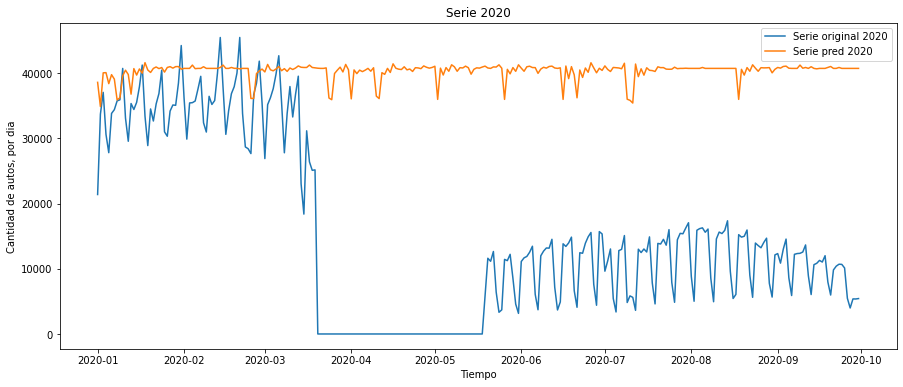

In [111]:
# Graficamos nuevamente la serie corregida
plt.figure(figsize = (15,6))
plt.plot(diario_2020.fecha, diario_2020.cantidad_pasos,label='Serie original 2020')
plt.plot(diario_2020.fecha, diario_2020.cantidad_pasos_pred,label='Serie pred 2020')
plt.title('Serie 2020')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.legend()
plt.show()

In [113]:
rmse_2020= round(np.sqrt(mean_squared_error(diario_2020.cantidad_pasos, diario_2020.cantidad_pasos_pred)),2)

# Calcular metrica de desempeño R^2
r2_2020 = round(r2_score(diario_2020.cantidad_pasos, diario_2020.cantidad_pasos_pred),2)

# Calcular metrica de desempeño MAPE
mape_2020 = round(mean_absolute_percentage_error(diario_2020.cantidad_pasos, diario_2020.cantidad_pasos_pred),2)

print("Resultados prediciones 2020:")
print("RMSE_2020:{}".format(rmse_2020))
print("R2_2020:{}".format(r2_2020))
print("MAPE_2020:{}".format(mape_2020))

Resultados prediciones 2020:
RMSE_2020:28549.28
R2_2020:-3.46
MAPE_2020:inf


En la predicción de la cantidad de pasaos para el año 2020 se sigue observando un error muy alto en mi opinión por los siguientes factores:

1. El año 2020 se ve observa un comportamiento atipico ocasionado por la pandemia mundial producto del covid-19. Esta situación mundial hizo que el comportamiento de la serie cambiara drasticamente y dado que en los datos utilizados para entrenar el modelo no hubo un comportamiento similar este no está en capacidad de predecir estas variaciones.

2. Quizas el número de lags utilizados en el modelo XGBoost no es suficiente para generalizar el modelo, incluso podría pensarse este como un parametro más a optimizar por el modelo.

3. La implementación de un modelo para todos los días no permite generalizar los patrones y/o comportamiento especiaes de cada tipo de día. Por ejemplo, en el analisis exploratorio se observa claramente que el comportamiento en días festivos y no festivos es diferente. Ahora dentro de cada una de estas categorías podría haber particularidades espaciales para cada tipo de día (Lunes, Martes, etc). Es decir el modelo trata cada día por igual.